In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import reuters

# Wczytanie, dekodowanie i eksploracja danych
W tej części po wczytaniu danych sprawdzono ich strukturę, rozmiar, zdekodowano kilka przykładowych wpisów ze zbioru treningowego i testowego oraz policzono podstawowe statystyki dla wpisów w zbiorze treningowym (liczba słów) i wreszcie zamieniono zbiory treningowy i testowy na bag of words oraz zakodowano etykiety 1 hot encoding)

In [2]:
# wczytanie danych
(train_data, train_labels), (test_data, test_labels) = reuters.load_data()

In [3]:
print(f"""Kształt zbioru treningowego: {train_data.shape},
kształt zbioru testowego: {test_data.shape}""")

Kształt zbioru treningowego: (8982,),
kształt zbioru testowego: (2246,)


In [4]:
# sprawdzenie co zawiera zbiór - są to listy liczb
train_data[:5]

array([list([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 30625, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4

In [5]:
# z dokumentacji zbioru reuters wynika, że dostępna jest metoda .get_word_index()
# która zwraca słownik - klucze to słowa, wartości to liczby
# wczytanie tego słownika
word_index_dict = reuters.get_word_index()
word_index_dict

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [6]:
# odwrócenie słownika do późniejszego zdekodowania treści artykułów
rev_word_index_dict = {v+3 : k for k, v in word_index_dict.items()}
# v+3 wynika z tego że 0-2 oznaczają nieznane znaki, padding, itp.
# więc dodajemy też 0-3 do słownika
rev_word_index_dict[0] = 'x'
rev_word_index_dict[1] = 'x'
rev_word_index_dict[2] = 'x'
rev_word_index_dict[3] = 'x'

In [7]:
rev_word_index_dict[4] # 4 powinno być "the"

'the'

In [8]:
# dekodowanie kilku przykładowych list ze zbioru treningowego
decode_train = lambda x: [rev_word_index_dict[i] for i in train_data[x]]
print(decode_train(0))
print(decode_train(242))
print(decode_train(543))
print(decode_train(34))

['x', 'mcgrath', 'rentcorp', 'said', 'as', 'a', 'result', 'of', 'its', 'december', 'acquisition', 'of', 'space', 'co', 'it', 'expects', 'earnings', 'per', 'share', 'in', '1987', 'of', '1', '15', 'to', '1', '30', 'dlrs', 'per', 'share', 'up', 'from', '70', 'cts', 'in', '1986', 'the', 'company', 'said', 'pretax', 'net', 'should', 'rise', 'to', 'nine', 'to', '10', 'mln', 'dlrs', 'from', 'six', 'mln', 'dlrs', 'in', '1986', 'and', 'rental', 'operation', 'revenues', 'to', '19', 'to', '22', 'mln', 'dlrs', 'from', '12', '5', 'mln', 'dlrs', 'it', 'said', 'cash', 'flow', 'per', 'share', 'this', 'year', 'should', 'be', '2', '50', 'to', 'three', 'dlrs', 'reuter', '3']
['x', 'deutsche', 'bank', 'ag', 'joint', 'chief', 'executive', 'friedrich', 'wilhelm', 'christians', 'said', 'he', 'believed', 'the', 'louvre', 'accord', 'on', 'currency', 'stability', 'was', 'still', 'intact', 'christians', 'told', 'a', 'news', 'conference', 'he', 'met', 'u', 's', 'treasury', 'secretary', 'james', 'baker', 'in', 'th

In [9]:
print(train_labels[[0, 242, 543, 34]]) # sprawdzenie kategorii dla tych wpisów

[ 3 19  4  1]


In [10]:
# sprawdzenie kategorii
print(np.unique(train_labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [11]:
print(f"jest {len(np.unique(train_labels))} kategorii w zbiorze treningowym")

jest 46 kategorii w zbiorze treningowym


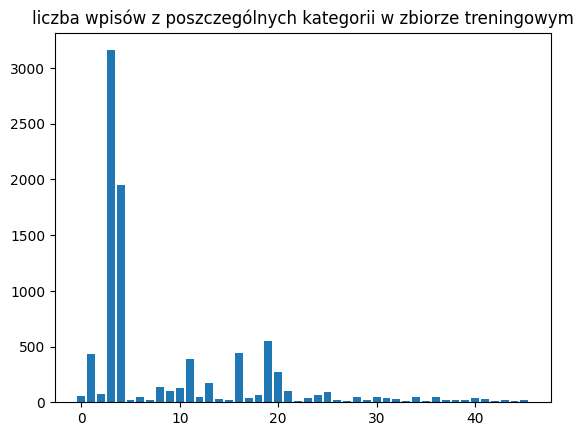

In [12]:
# sprawdzenie jak często kategorie występują w zbiorze treningowym
plt.bar(range(0,46), np.bincount(train_labels))
plt.title("liczba wpisów z poszczególnych kategorii w zbiorze treningowym")
plt.show()

In [13]:
# sprawdzenie czy dekodowanie działa też na zbiorze testowym i jakie są etykiety
decode_test = lambda x: [rev_word_index_dict[i] for i in test_data[x]]
print(decode_test(235))
print(decode_test(32))
print(np.unique(test_labels))

['x', 'there', 'were', 'six', 'grain', 'ships', 'loading', 'and', 'eight', 'ships', 'were', 'waiting', 'to', 'load', 'at', 'portland', 'according', 'to', 'the', 'portland', 'merchants', 'exchange', 'reuter', '3']
['x', 'lt', 'canada', 'northwest', 'energy', 'ltd', 'said', 'it', 'reached', 'agreement', 'in', 'principle', 'to', 'sell', 'one', 'mln', 'preferred', 'shares', 'by', 'way', 'of', 'private', 'placement', 'to', 'raise', '32', '5', 'mln', 'dlrs', 'for', 'oil', 'and', 'gas', 'exploration', 'the', '5', '4', 'pct', 'cumulative', 'redeemable', 'convertible', 'series', 'd', 'preferred', 'shares', 'will', 'be', 'flow', 'through', 'shares', 'entitling', 'holders', 'to', 'tax', 'deductions', 'not', 'claimed', 'by', 'the', 'company', 'the', 'shares', 'will', 'be', 'convertible', 'anytime', 'after', 'issue', 'into', 'common', 'shares', 'at', 'an', 'equivalent', 'conversion', 'price', 'of', '32', '50', 'dlrs', 'a', 'share', 'after', 'one', 'year', 'they', 'will', 'be', 'redeemable', 'at', '

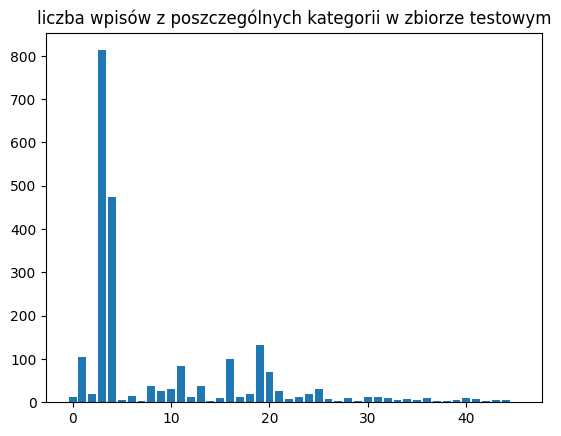

In [14]:
# sprawdzenie jak często kategorie występują w zbiorze testowym
plt.bar(range(0,46), np.bincount(test_labels))
plt.title("liczba wpisów z poszczególnych kategorii w zbiorze testowym")
plt.show()

In [15]:
# sprawdzenie kilku statystyk dla wpisów w zbiorze treningowym
train_len_list = [len(x) for x in train_data]
print(f"""Najdłuższy wpis ma {np.max(train_len_list)},
najkrótszy {np.min(train_len_list)},
średnio {np.mean(train_len_list)} słów""")

Najdłuższy wpis ma 2376,
najkrótszy 13,
średnio 145.5398574927633 słów


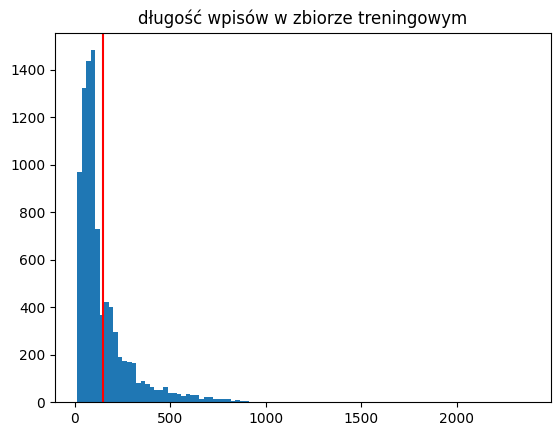

In [16]:
# rozkład długości wpisów w zbiorze treningowym
plt.hist(train_len_list, bins = 100)
plt.axvline(np.mean(train_len_list), color = 'r')
plt.title('długość wpisów w zbiorze treningowym')
plt.show()

In [17]:
# najczęściej występujące słowa
for i in range(4, 100):
    print(f"{i} : {rev_word_index_dict[i]}")

4 : the
5 : of
6 : to
7 : in
8 : said
9 : and
10 : a
11 : mln
12 : 3
13 : for
14 : vs
15 : dlrs
16 : it
17 : reuter
18 : 000
19 : 1
20 : pct
21 : on
22 : from
23 : is
24 : that
25 : its
26 : cts
27 : by
28 : at
29 : year
30 : be
31 : with
32 : 2
33 : will
34 : was
35 : billion
36 : he
37 : u
38 : s
39 : net
40 : has
41 : would
42 : an
43 : as
44 : 5
45 : not
46 : loss
47 : 4
48 : 1986
49 : company
50 : which
51 : but
52 : this
53 : shr
54 : last
55 : are
56 : lt
57 : have
58 : or
59 : 6
60 : bank
61 : 7
62 : were
63 : 8
64 : had
65 : oil
66 : trade
67 : share
68 : one
69 : about
70 : 0
71 : inc
72 : 9
73 : new
74 : profit
75 : also
76 : market
77 : they
78 : two
79 : shares
80 : stock
81 : corp
82 : tonnes
83 : 10
84 : up
85 : been
86 : revs
87 : prices
88 : sales
89 : 1987
90 : per
91 : may
92 : after
93 : april
94 : march
95 : more
96 : price
97 : than
98 : quarter
99 : first


In [18]:
# zamiana na bag of words
def encode(data, dimension = len(rev_word_index_dict.items())):
  result = np.zeros((len(data), dimension))
  for i, l in enumerate(data):
      for w in l:
        result[i, w] = 1.
  return result

In [19]:
bow_train_data = encode(train_data)
bow_test_data = encode(test_data)

In [20]:
bow_train_data[:4, :]

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [21]:
# etykiety 1 hot encoding
from tensorflow.keras.utils import to_categorical
categorical_train_labels = to_categorical(train_labels)
categorical_test_labels = to_categorical(test_labels)

In [22]:
categorical_train_labels[:4, :]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

# Sieć neuronowa

In [23]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(46, activation = "softmax") # 46 klas, 1 neuron - 1 klasa
])

model.compile(optimizer = "rmsprop", metrics = ["accuracy"], loss = "categorical_crossentropy")
# funkcja straty - CategoricalCrossentropy https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class
# when there are two or more label classes. We expect labels to be provided in a one_hot representation.

In [24]:
x_val = bow_train_data[:1000]
x_part_train = bow_train_data[1000:]
y_val = categorical_train_labels[:1000]
y_part_train = categorical_train_labels[1000:]

In [25]:
history = model.fit(x = x_part_train, y = y_part_train, epochs = 20, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/20
63/63 [==============================] - 3s 33ms/step - loss: 1.8405 - accuracy: 0.6292 - val_loss: 1.2475 - val_accuracy: 0.7290
Epoch 2/20
63/63 [==============================] - 2s 29ms/step - loss: 0.9543 - accuracy: 0.7990 - val_loss: 1.0663 - val_accuracy: 0.7740
Epoch 3/20
63/63 [==============================] - 2s 28ms/step - loss: 0.6236 - accuracy: 0.8708 - val_loss: 0.9277 - val_accuracy: 0.8090
Epoch 4/20
63/63 [==============================] - 2s 29ms/step - loss: 0.4170 - accuracy: 0.9172 - val_loss: 0.8991 - val_accuracy: 0.8210
Epoch 5/20
63/63 [==============================] - 2s 28ms/step - loss: 0.3049 - accuracy: 0.9351 - val_loss: 0.9223 - val_accuracy: 0.8140
Epoch 6/20
63/63 [==============================] - 2s 28ms/step - loss: 0.2337 - accuracy: 0.9468 - val_loss: 0.9225 - val_accuracy: 0.8220
Epoch 7/20
63/63 [==============================] - 2s 28ms/step - loss: 0.1970 - accuracy: 0.9519 - val_loss: 0.9895 - val_accuracy: 0.8190
Epoch 8/20
63

In [26]:
history_dict = history.history

In [27]:
def makeGraph(fname):
  train_values = history_dict[fname]
  val_values = history_dict[f"val_{fname}"]
  epochs = range(1, len(val_values) + 1)
  plt.plot(epochs, train_values, label = f"training {fname}")
  plt.plot(epochs, val_values, label = f"validation {fname}")
  plt.xticks(epochs)
  plt.grid(True)
  plt.legend()

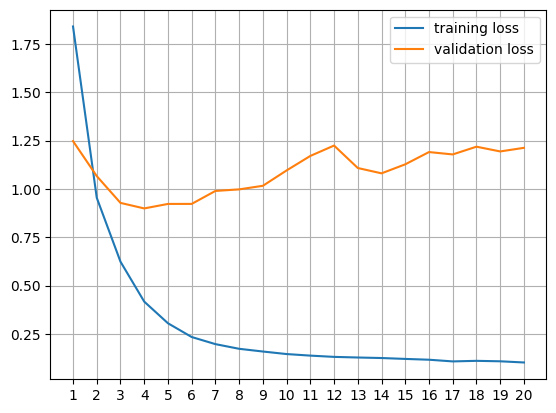

In [28]:
makeGraph("loss")

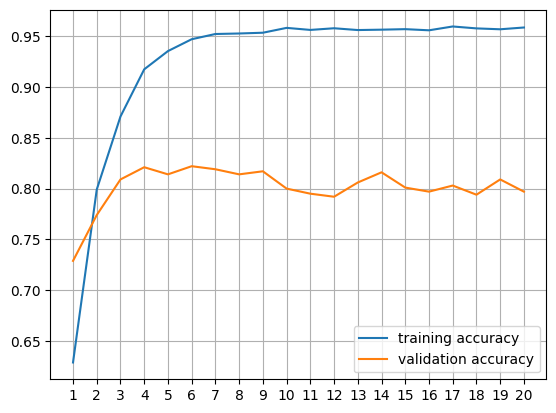

In [29]:
makeGraph("accuracy")

In [30]:
# po 4 epokach model zaczyna się przetrenowywać

model = keras.Sequential([
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(46, activation = "softmax") # 46 klas, 1 neuron - 1 klasa
])

model.compile(optimizer = "rmsprop", metrics = ["accuracy"], loss = "categorical_crossentropy")

history = model.fit(x = bow_train_data, y = categorical_train_labels, epochs = 4, batch_size = 128)

Epoch 1/4
71/71 [==============================] - 2s 27ms/step - loss: 1.7277 - accuracy: 0.6446
Epoch 2/4
71/71 [==============================] - 2s 25ms/step - loss: 0.8950 - accuracy: 0.8059
Epoch 3/4
71/71 [==============================] - 2s 26ms/step - loss: 0.5862 - accuracy: 0.8750
Epoch 4/4
71/71 [==============================] - 2s 26ms/step - loss: 0.3945 - accuracy: 0.9173


In [31]:
results = model.evaluate(bow_test_data, categorical_test_labels)

71/71 [==============================] - 0s 4ms/step - loss: 0.9445 - accuracy: 0.7881
